In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import csv

In [2]:
#load assesment file
CSCO = "resources/HistoricalData_CSCO.csv"
CSCO_df = pd.read_csv(CSCO)
CSCO_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/24/2021,$53.39,21128860,$52.96,$53.765,$52.79
1,05/21/2021,$52.43,24468370,$52.765,$52.93,$52.24
2,05/20/2021,$52.85,48830760,$50.41,$52.97,$50.1
3,05/19/2021,$52.47,29187940,$51.88,$52.66,$51.86
4,05/18/2021,$52.93,20177200,$52.8,$53.34,$52.74


CLEAN, RESHAPE AND CONVERT DATATYPE

In [3]:
CSCO_df['Date']= pd.to_datetime(CSCO_df['Date'])
CSCO_df['Close/Last'] = CSCO_df['Close/Last'].str.replace('$','')
CSCO_df['Open'] = CSCO_df['Open'].str.replace('$','')
CSCO_df['High'] = CSCO_df['High'].str.replace('$','')
CSCO_df['Low'] = CSCO_df['Low'].str.replace('$','')
CSCO_df = CSCO_df.apply( pd.to_numeric)

<ipython-input-3-8171b38c4446>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  CSCO_df['Close/Last'] = CSCO_df['Close/Last'].str.replace('$','')
<ipython-input-3-8171b38c4446>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  CSCO_df['Open'] = CSCO_df['Open'].str.replace('$','')
<ipython-input-3-8171b38c4446>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  CSCO_df['High'] = CSCO_df['High'].str.replace('$','')
<ipython-input-3-8171b38c4446>:5: FutureWarning: The default value of regex will change from True to False in a fut

FORMAT DATE COLUMN

In [4]:
CSCO_df['Date']= pd.to_datetime(CSCO_df['Date'])
CSCO_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-24,53.39,21128860,52.960,53.765,52.79
1,2021-05-21,52.43,24468370,52.765,52.930,52.24
2,2021-05-20,52.85,48830760,50.410,52.970,50.10
3,2021-05-19,52.47,29187940,51.880,52.660,51.86
4,2021-05-18,52.93,20177200,52.800,53.340,52.74


SPLIT DATAFRAME

In [5]:
#setup datetime for first 4 years
start_date = "2016-05-24"
end_date = "2020-05-24"

after_start_date = CSCO_df["Date"] >= start_date
before_end_date = CSCO_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
CSCO_df_4 = CSCO_df.loc[between_two_dates]
CSCO_df_4.head()

,Date,Close/Last,Volume,Open,High,Low
252,2020-05-22,44.900,12592810,44.67,44.950,44.1200
253,2020-05-21,44.640,18674890,45.45,45.655,44.5550
254,2020-05-20,45.440,20184460,45.05,45.820,45.0300
255,2020-05-19,44.605,24345420,44.83,44.980,44.4100
256,2020-05-18,45.060,26980080,45.21,45.295,44.3301


SPLIT DATAFRAME

In [6]:
#setup datetime for last year
start_date = "2020-05-25"
end_date = "2021-05-24"

after_start_date = CSCO_df["Date"] >= start_date
before_end_date = CSCO_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
CSCO_df_ls = CSCO_df.loc[between_two_dates]
CSCO_df_ls.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-24,53.39,21128860,52.960,53.765,52.79
1,2021-05-21,52.43,24468370,52.765,52.930,52.24
2,2021-05-20,52.85,48830760,50.410,52.970,50.10
3,2021-05-19,52.47,29187940,51.880,52.660,51.86
4,2021-05-18,52.93,20177200,52.800,53.340,52.74


PLOT FIRST DF (4YEARS)

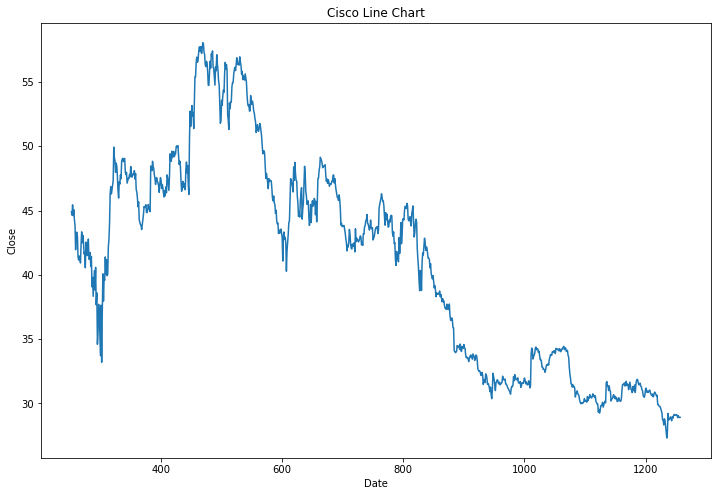

In [7]:
plt.figure(figsize=(12,8))
plt.plot(CSCO_df_4['Close/Last'])
plt.title("Cisco Line Chart")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

PLOT SECOND DF (LAST YEAR)

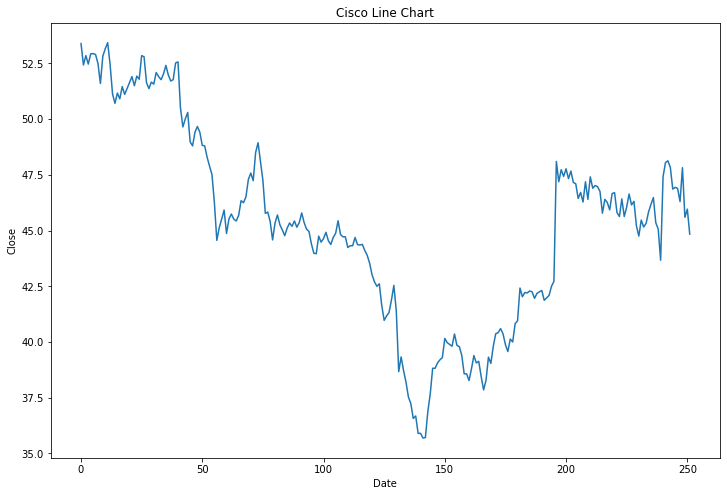

In [8]:
plt.figure(figsize=(12,8))
plt.plot(CSCO_df_ls['Close/Last'])
plt.title("Cisco Line Chart")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

SHAPPING, FITTING, TRAINING, TESTING ML ON 1ST DF

In [9]:
CSCO_df_4.shape

(1006, 6)

In [10]:
X = np.array(CSCO_df_4['Open']).reshape(1006,-1)
Y = np.array(CSCO_df_4['Close/Last']).reshape(1006,-1)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X, Y)

LinearRegression()

In [14]:
print('Linear Regression intercept:', lr.intercept_)
print('coefficient count:', len(lr.coef_))

Linear Regression intercept: [0.18821674]
coefficient count: 1


In [15]:
from sklearn.metrics import accuracy_score
print('Accuracy:', lr.score(X, Y))

Accuracy: 0.9959163112941813


In [16]:
# Predicting the price
lr.predict(X)

array([[44.65815329],
       [45.43465991],
       [45.03645139],
       ...,
       [29.00855843],
       [28.91896151],
       [28.64021555]])

Text(0.5, 1.0, '4 Years CLosing Price vs Predicted Closing Price')

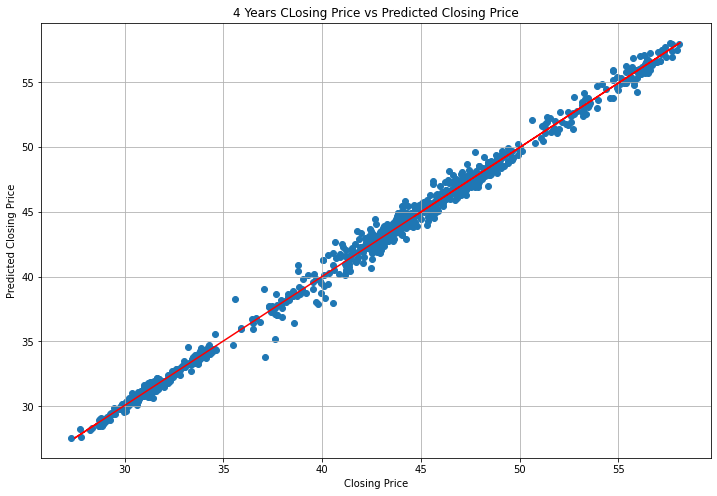

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(CSCO_df_4['Close/Last'], lr.predict(X))
plt.plot(X, lr.predict(X), color = 'red')
plt.xlabel('Closing Price')
plt.ylabel('Predicted Closing Price')
plt.savefig('images/CSCO_4y.jpg', dpi=40)
plt.grid()
plt.title('4 Years CLosing Price vs Predicted Closing Price')

TRAINING, TESTING ML ON 2ND DF

In [19]:
CSCO_df_ls.shape

(252, 6)

In [20]:
X_ls = np.array(CSCO_df_ls['Open']).reshape(252,-1)
Y_ls = np.array(CSCO_df_ls['Close/Last']).reshape(252,-1)

In [21]:
lr.fit(X_ls, Y_ls)

LinearRegression()

In [22]:
print('Linear Regression intercept:', lr.intercept_)
print('coefficient count:', len(lr.coef_))

Linear Regression intercept: [-0.31429754]
coefficient count: 1


In [23]:
print('Accuracy:', lr.score(X_ls, Y_ls))

Accuracy: 0.9831147131271732


In [24]:
# Predicting the price
lr.predict(X_ls)

array([[53.0834176 ],
       [52.88680592],
       [50.51234182],
       [51.99449139],
       [52.9220952 ],
       [52.8817646 ],
       [53.05316965],
       [52.22639234],
       [52.29697089],
       [53.2245747 ],
       [54.10176527],
       [52.5994504 ],
       [51.17779673],
       [51.09713552],
       [51.21812733],
       [51.31895383],
       [51.32903648],
       [51.28870588],
       [51.67184658],
       [51.69201188],
       [51.76259043],
       [51.61487961],
       [51.92391284],
       [51.95416079],
       [52.71035955],
       [52.64482232],
       [52.56920245],
       [51.87349959],
       [51.62143333],
       [51.75250778],
       [52.18606174],
       [51.94407814],
       [52.05498729],
       [52.12556584],
       [52.09531789],
       [51.7404086 ],
       [51.86341694],
       [51.94407814],
       [52.22639234],
       [52.51959581],
       [50.70391217],
       [50.67870554],
       [50.03845726],
       [50.11911846],
       [49.03019225],
       [48

Text(0.5, 1.0, '1 Year CLosing Price vs Predicted Closing Price')

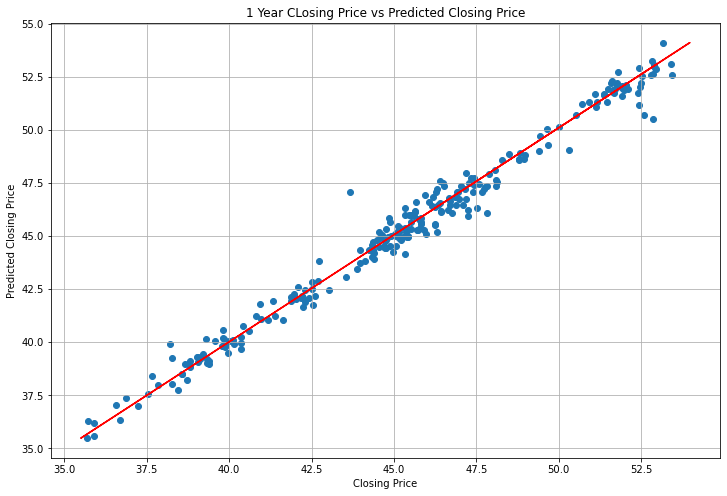

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(CSCO_df_ls['Close/Last'], lr.predict(X_ls))
plt.plot(X_ls, lr.predict(X_ls), color = 'red')
plt.xlabel('Closing Price')
plt.ylabel('Predicted Closing Price')
plt.savefig('images/CSCO_ls.jpg', dpi=40)
plt.grid()
plt.title('1 Year CLosing Price vs Predicted Closing Price')